In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
players_df = pd.read_csv('./data/players.csv')

print(players_df.head())

   player_id first_name     last_name                name  last_season  \
0         10   Miroslav         Klose      Miroslav Klose         2015   
1         26      Roman  Weidenfeller  Roman Weidenfeller         2017   
2         65    Dimitar      Berbatov    Dimitar Berbatov         2015   
3         77        NaN         Lúcio               Lúcio         2012   
4         80        Tom        Starke          Tom Starke         2017   

   current_club_id         player_code    country_of_birth city_of_birth  \
0              398      miroslav-klose              Poland         Opole   
1               16  roman-weidenfeller             Germany          Diez   
2             1091    dimitar-berbatov            Bulgaria   Blagoevgrad   
3              506               lucio              Brazil      Brasília   
4               27          tom-starke  East Germany (GDR)       Freital   

  country_of_citizenship  ...   foot height_in_cm contract_expiration_date  \
0                Ger

Initial missing values:
player_id                                   0
first_name                               1989
last_name                                   0
name                                        0
last_season                                 0
current_club_id                             0
player_code                                 0
country_of_birth                         2700
city_of_birth                            2186
country_of_citizenship                    570
date_of_birth                              45
sub_position                              174
position                                    0
foot                                     2351
height_in_cm                             2034
contract_expiration_date                11445
agent_name                              15339
image_url                                   0
url                                         0
current_club_domestic_competition_id        0
current_club_name                           0
market_val

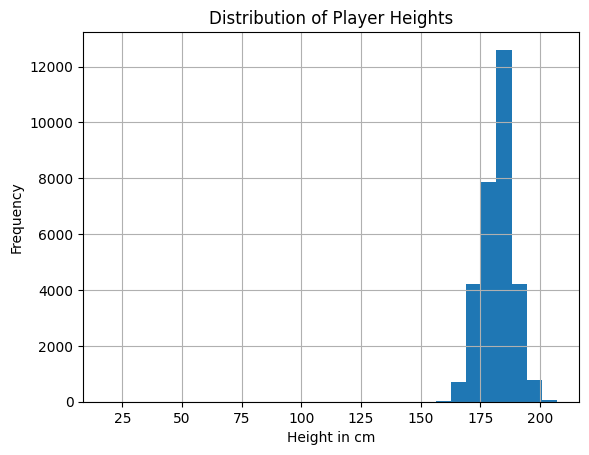

In [3]:
# Initial check for missing values
print("Initial missing values:")
print(players_df.isnull().sum())

# Removing rows where 'date_of_birth' is missing
players_df = players_df.dropna(subset=['date_of_birth'])

# Dropping columns that are not needed
columns_to_drop = ['sub_position', 'city_of_birth', 'country_of_citizenship', 'country_of_birth', 'contract_expiration_date', 'agent_name', 'market_value_in_eur','highest_market_value_in_eur']
players_df.drop(columns=columns_to_drop, inplace=True)

# Data Cleaning
# Fill missing 'height_in_cm' with the median height and directly assign it back
median_height = players_df['height_in_cm'].median()
players_df['height_in_cm'] = players_df['height_in_cm'].fillna(median_height)

# Fill missing 'foot' with the mode and directly assign it back
mode_foot = players_df['foot'].mode()[0]
players_df['foot'] = players_df['foot'].fillna(mode_foot)

# Summary statistics for numerical columns after cleaning
print("\nSummary statistics after cleaning:")
print(players_df.describe())

#save the cleaned data
players_df.to_csv('./data/cleaned_players.csv', index=False)

# Re-check for missing values after cleaning
print("\nMissing values after cleaning:")
print(players_df.isnull().sum())

# Visualizing the distribution of 'height_in_cm'
players_df['height_in_cm'].hist(bins=30)
plt.title('Distribution of Player Heights')
plt.xlabel('Height in cm')
plt.ylabel('Frequency')
plt.show()

In [4]:
# Load the games data
games_df = pd.read_csv('./data/games.csv')

game_id              0
competition_id       0
season               0
round                0
date                 0
home_club_id         0
away_club_id         0
home_club_goals      0
away_club_goals      0
stadium             92
url                  0
aggregate            0
competition_type     0
dtype: int64
            game_id        season                           date  \
count  3.614100e+04  36141.000000                          36141   
mean   3.535505e+06   2020.320771  2021-04-10 13:09:11.340582656   
min    2.867401e+06   2017.000000            2018-01-01 00:00:00   
25%    3.209827e+06   2019.000000            2019-09-13 00:00:00   
50%    3.487171e+06   2020.000000            2021-04-11 00:00:00   
75%    3.860308e+06   2022.000000            2022-11-03 00:00:00   
max    4.352472e+06   2023.000000            2024-05-26 00:00:00   
std    3.864053e+05      1.856190                            NaN   

        home_club_id   away_club_id  home_club_goals  away_club_goals  
cou

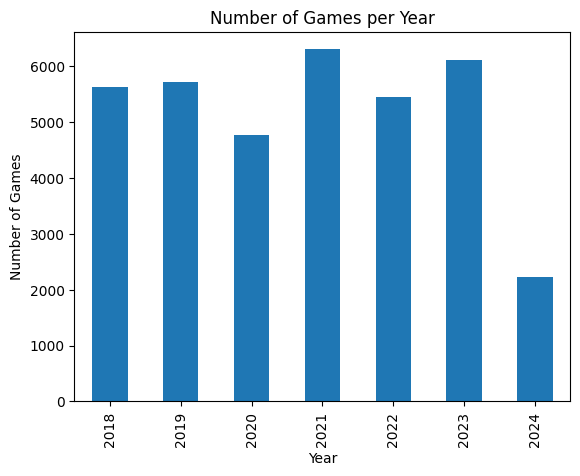

In [5]:
# Convert 'date' to datetime format
games_df['date'] = pd.to_datetime(games_df['date'])

# Drop unnecessary columns
columns_to_drop = [
    'home_club_position', 'away_club_position', 'attendance', 
    'home_club_name', 'away_club_name', 
    'home_club_formation', 'away_club_formation', 
    'home_club_manager_name', 'away_club_manager_name', 
    'referee'
]
games_df.drop(columns=columns_to_drop, inplace=True)

# Filter for recent seasons, e.g., from 2018 onwards
games_df = games_df[games_df['date'].dt.year >= 2018]

# Check for remaining missing values and handle if necessary
print(games_df.isnull().sum())

# Summary of the cleaned dataset
print(games_df.describe())

# Save the cleaned data to a new CSV file
games_df.to_csv('./data/cleaned_games.csv', index=False)

# Visualizing the number of games per year
games_df['date'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Number of Games per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.show()

Average Home Goals: 1.6129050109294154
Average Away Goals: 1.3800116211504938


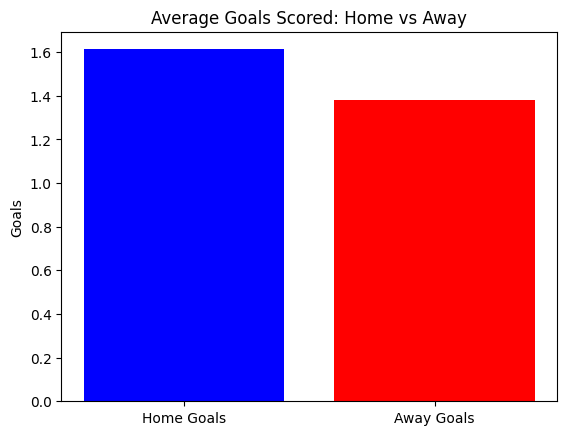

In [6]:
# Calculate average home and away goals
avg_home_goals = games_df['home_club_goals'].mean()
avg_away_goals = games_df['away_club_goals'].mean()

# Print the results
print(f"Average Home Goals: {avg_home_goals}")
print(f"Average Away Goals: {avg_away_goals}")

# Plotting the results
plt.bar(['Home Goals', 'Away Goals'], [avg_home_goals, avg_away_goals], color=['blue', 'red'])
plt.title('Average Goals Scored: Home vs Away')
plt.ylabel('Goals')
plt.show()

In [7]:
# Load the clubs data
clubs_df = pd.read_csv('./data/clubs.csv')


In [8]:
# Drop unnecessary columns
columns_to_drop = ['total_market_value', 'coach_name', 'filename', 'url']
clubs_df = clubs_df.drop(columns=columns_to_drop)

# Handle missing values
# Fill 'average_age' with the median of the column
clubs_df['average_age'] = clubs_df['average_age'].fillna(clubs_df['average_age'].median())

# Fill 'foreigners_percentage' with the mean of the column
clubs_df['foreigners_percentage'] = clubs_df['foreigners_percentage'].fillna(clubs_df['foreigners_percentage'].mean())

clubs_df.to_csv('./data/cleaned_clubs.csv', index=False)
# Verify changes and prepare for integration
print(clubs_df.head())
print(clubs_df.describe())
print(clubs_df.isnull().sum())

   club_id          club_code                              name  \
0      105    sv-darmstadt-98  Sportverein Darmstadt 1898 e. V.   
1    11127  ural-ekaterinburg             FK Ural Yekaterinburg   
2      114  besiktas-istanbul         Beşiktaş Jimnastik Kulübü   
3       12             as-rom        Associazione Sportiva Roma   
4      148  tottenham-hotspur   Tottenham Hotspur Football Club   

  domestic_competition_id  squad_size  average_age  foreigners_number  \
0                      L1          31         26.7                 11   
1                     RU1          27         28.2                 15   
2                     TR1          39         26.0                 17   
3                     IT1          26         27.1                 18   
4                     GB1          30         25.5                 22   

   foreigners_percentage  national_team_players  \
0                   35.5                      1   
1                   55.6                      6   
2    

In [9]:
appearances_df = pd.read_csv('./data/appearances.csv')


In [10]:
# Convert date field
appearances_df['date'] = pd.to_datetime(appearances_df['date'])

# Check for any missing values
print(appearances_df.isnull().sum())

# Drop unnecessary data
performance_fields = ['yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played']
for field in performance_fields:
    appearances_df[field].fillna(0, inplace=True)

# Save the cleaned data
appearances_df.to_csv('./data/cleaned_appearances.csv', index=False)

print(appearances_df.describe())

appearance_id             0
game_id                   0
player_id                 0
player_club_id            0
player_current_club_id    0
date                      0
player_name               6
competition_id            0
yellow_cards              0
red_cards                 0
goals                     0
assists                   0
minutes_played            0
dtype: int64


C:\Users\Rony\AppData\Local\Temp\ipykernel_28564\2514474978.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  appearances_df[field].fillna(0, inplace=True)


            game_id     player_id  player_club_id  player_current_club_id  \
count  1.583207e+06  1.583207e+06    1.583207e+06            1.583207e+06   
mean   3.071351e+06  1.907343e+05    3.008048e+03            3.667291e+03   
min    2.211607e+06  1.000000e+01    1.000000e+00           -1.000000e+00   
25%    2.578120e+06  5.606600e+04    2.890000e+02            3.360000e+02   
50%    3.047893e+06  1.331790e+05    8.330000e+02            9.240000e+02   
75%    3.588913e+06  2.789850e+05    2.441000e+03            2.687000e+03   
max    4.352472e+06  1.240467e+06    1.016340e+05            8.367800e+04   
std    5.934636e+05  1.751421e+05    7.661042e+03            9.356158e+03   

                                date  yellow_cards     red_cards  \
count                        1583207  1.583207e+06  1.583207e+06   
mean   2018-07-20 08:14:49.336138752  1.482725e-01  3.800514e-03   
min              2012-07-03 00:00:00  0.000000e+00  0.000000e+00   
25%              2015-08-10 00:00:

In [11]:
club_games_df = pd.read_csv('./data/club_games.csv')


In [12]:
# visualize the club_games data
# Check for missing values

# drop unnecessary columns
columns_to_drop = ['own_position', 'own_manager_name', 'opponent_position', 'opponent_manager_name']
# Drop the columns
club_games_df = club_games_df.drop(columns=columns_to_drop)
print(club_games_df.head())
print(club_games_df.describe())
print(club_games_df.isnull().sum())

club_games_df.to_csv('./data/cleaned_club_games.csv', index=False)


   game_id  club_id  own_goals  opponent_id  opponent_goals hosting  is_win
0  2320450     1468          0           24               2    Home       0
1  2320460        1          3           86               1    Home       1
2  2320472     2036          4           72               5    Home       0
3  2321044       16          2           23               1    Home       1
4  2321060       23          0           24               2    Home       0
            game_id        club_id      own_goals    opponent_id  \
count  1.366200e+05  136620.000000  136620.000000  136620.000000   
mean   3.065326e+06    4656.283868       1.459076    4656.283868   
std    5.920185e+05   10846.258934       1.400520   10846.258934   
min    2.211607e+06       1.000000       0.000000       1.000000   
25%    2.567502e+06     352.000000       0.000000     352.000000   
50%    3.047552e+06     989.000000       1.000000     989.000000   
75%    3.584549e+06    3057.000000       2.000000    3057.000000   


In [13]:
player_valuations_df = pd.read_csv('./data/player_valuations.csv')


In [14]:
print(player_valuations_df.head())
print(player_valuations_df.describe())
print(player_valuations_df.isnull().sum())

player_valuations_df.to_csv('./data/cleaned_player_valuations.csv', index=False)

   player_id        date  market_value_in_eur  current_club_id  \
0     405973  2000-01-20               150000             3057   
1     342216  2001-07-20               100000             1241   
2       3132  2003-12-09               400000              126   
3       6893  2003-12-15               900000              984   
4         10  2004-10-04              7000000              398   

  player_club_domestic_competition_id  
0                                 BE1  
1                                 SC1  
2                                 TR1  
3                                 GB1  
4                                 IT1  
          player_id  market_value_in_eur  current_club_id
count  4.689660e+05         4.689660e+05    468966.000000
mean   2.066082e+05         2.403944e+06      4079.173900
std    1.881605e+05         6.788469e+06      9568.553252
min    1.000000e+01         0.000000e+00         3.000000
25%    5.720725e+04         2.000000e+05       369.000000
50%    1.528580

In [15]:
competitions_df = pd.read_csv('./data/competitions.csv')

In [16]:
print(competitions_df.head())
print(competitions_df.describe())
print(competitions_df.isnull().sum())

competitions_df.to_csv('./data/cleaned_competitions.csv', index=False)

  competition_id               competition_code  \
0            CIT                      italy-cup   
1           NLSC           johan-cruijff-schaal   
2            GRP                kypello-elladas   
3           POSU  supertaca-candido-de-oliveira   
4           RUSS              russian-super-cup   

                            name            sub_type          type  \
0                      italy-cup        domestic_cup  domestic_cup   
1           johan-cruijff-schaal  domestic_super_cup         other   
2                kypello-elladas        domestic_cup  domestic_cup   
3  supertaca-candido-de-oliveira  domestic_super_cup         other   
4              russian-super-cup  domestic_super_cup         other   

   country_id country_name domestic_league_code confederation  \
0          75        Italy                  IT1        europa   
1         122  Netherlands                  NL1        europa   
2          56       Greece                  GR1        europa   
3         13

In [17]:
# Load appearances data
appearances_df = pd.read_csv('./data/cleaned_appearances.csv')

# Convert dates to datetime and extract the year
appearances_df['date'] = pd.to_datetime(appearances_df['date'])
appearances_df['season'] = appearances_df['date'].dt.year  # assuming season is based on the year

# Identify the last fully completed season
current_year = pd.Timestamp.today().year
if appearances_df['date'].max() < pd.Timestamp(current_year, 1, 1):
    last_season = appearances_df['date'].max().year
else:
    last_season = appearances_df['date'].max().year - 1

# Aggregate performance metrics by player and season
performance_metrics = appearances_df.groupby(['player_id', 'season']).agg({
    'goals': 'sum',
    'assists': 'sum',
    'minutes_played': 'sum'
}).reset_index()

# Calculate improvement for each player from the season before last to the last full season
performance_metrics['previous_season_goals'] = performance_metrics.groupby('player_id')['goals'].shift(1)
performance_metrics['improvement'] = performance_metrics['goals'] - performance_metrics['previous_season_goals']

# Filter for the last two seasons (last full season and the one before it)
top_improvers = performance_metrics[(performance_metrics['season'] >= last_season - 1) & (performance_metrics['season'] <= last_season)].sort_values(by='improvement', ascending=False)

# save the top_improvers
top_improvers.to_csv('./data/top_improvers.csv', index=False)
# Print top 10 improved players
print(top_improvers.head(10))

# Load the cleaned players data
players_df = pd.read_csv('./data/cleaned_players.csv')

# Merge the top_improvers with the players data to get player name, position, current_club_name, date_of_birth, foot
top_improvers = top_improvers.merge(players_df[['player_id', 'name', 'position', 'current_club_name', 'date_of_birth', 'foot']], on='player_id')

# Print the top 10 improved players
print(top_improvers.head(10))

       player_id  season  goals  assists  minutes_played  \
27047      68863    2023     35       10            3677   
89661     552955    2023     34        6            3687   
28126      72522    2023     32       14            4021   
83457     433049    2023     25        4            4036   
89589     550550    2022     22        7            3116   
40955     125781    2023     26       14            4213   
75597     344381    2022     37       14            4107   
63803     251664    2022     22        7            3113   
95421     776798    2023     18        4            3093   
73112     325443    2023     17        5            1644   

       previous_season_goals  improvement  
27047                    4.0         31.0  
89661                    6.0         28.0  
28126                   11.0         21.0  
83457                    4.0         21.0  
89589                    3.0         19.0  
40955                    7.0         19.0  
75597                   19.0   

In [18]:
# Load appearances data
appearances_df = pd.read_csv('./data/cleaned_appearances.csv')

# Convert dates to datetime and extract the year
appearances_df['date'] = pd.to_datetime(appearances_df['date'])
appearances_df['season'] = appearances_df['date'].dt.year

# Filter for the 2022 and 2023 seasons only
filtered_df = appearances_df[appearances_df['season'].isin([2022, 2023])]

# Aggregate performance metrics by player and season
performance_metrics = filtered_df.groupby(['player_id', 'season']).agg({
    'goals': 'sum',
    'assists': 'sum',
    'minutes_played': 'sum'
}).reset_index()

# Pivot the data to compare 2022 to 2023 directly
pivot_df = performance_metrics.pivot(index='player_id', columns='season', values=['goals', 'assists', 'minutes_played'])
pivot_df.columns = ['_'.join(map(str, col)).strip() for col in pivot_df.columns.values]

# Calculate improvement as the difference between 2023 and 2022 metrics
pivot_df['goal_improvement'] = pivot_df['goals_2023'] - pivot_df['goals_2022']
pivot_df['assist_improvement'] = pivot_df['assists_2023'] - pivot_df['assists_2022']

# Load player details
players_df = pd.read_csv('./data/cleaned_players.csv')

# Merge improvements with player details
result_df = pivot_df.merge(players_df[['player_id', 'name', 'position', 'current_club_name', 'date_of_birth', 'foot']],
                           on='player_id', how='left')

# Sort by goal improvement to find top improvers
top_improvers = result_df.sort_values(by='goal_improvement', ascending=False)

# Print the top 10 improved players
print(top_improvers[['name', 'position', 'current_club_name', 'goal_improvement', 'assist_improvement']].head(10))

                   name position  \
727        Mauro Icardi   Attack   
7098   Santiago Gimenez   Attack   
775        Luuk de Jong   Attack   
5786  Youssef En-Nesyri   Attack   
1465  Antoine Griezmann   Attack   
8869      Abdallah Sima   Attack   
8870    Nicolas Jackson   Attack   
5460   Lautaro Martínez   Attack   
7332     Julián Álvarez   Attack   
6945     Thijs Dallinga   Attack   

                                      current_club_name  goal_improvement  \
727                             Galatasaray Spor Kulübü              31.0   
7098                                Feyenoord Rotterdam              28.0   
775   Eindhovense Voetbalvereniging Philips Sport Ve...              21.0   
5786                         Sevilla Fútbol Club S.A.D.              21.0   
1465                     Club Atlético de Madrid S.A.D.              19.0   
8869             Brighton and Hove Albion Football Club              18.0   
8870                              Chelsea Football Club         

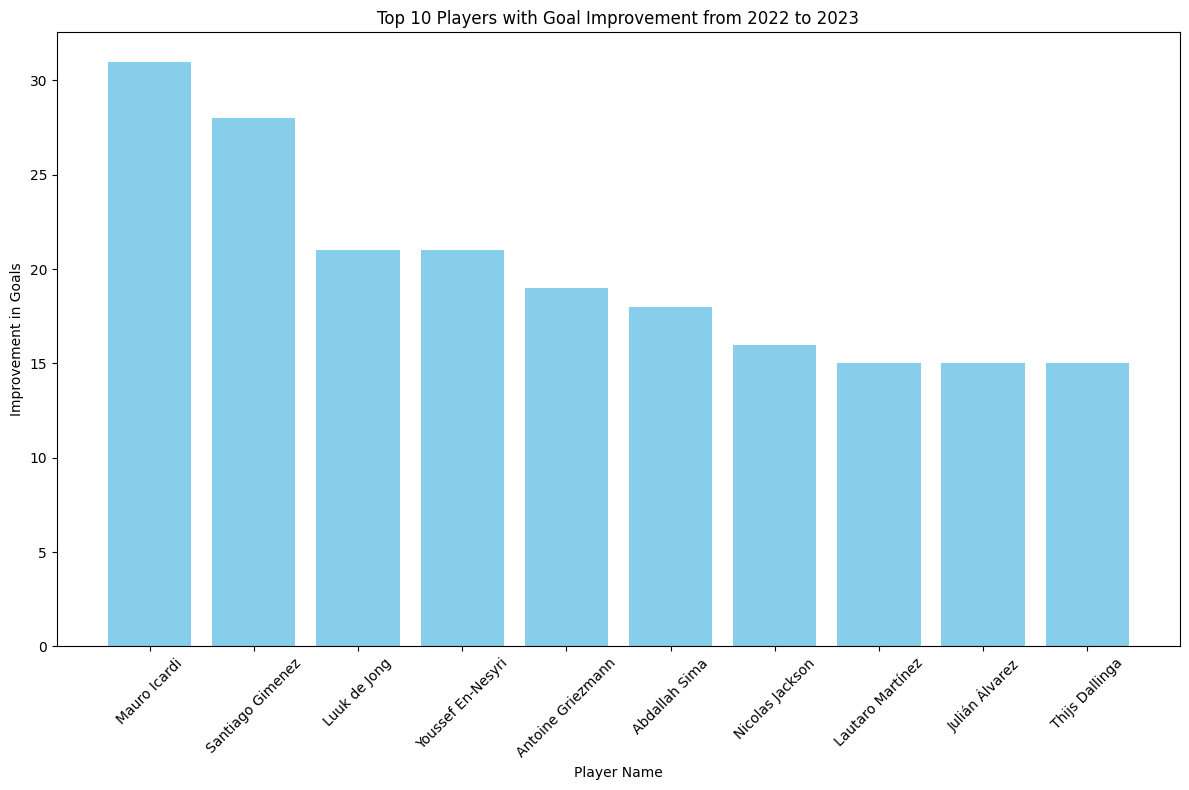

In [19]:
# Save the top improvers to a new CSV file
top_goal_improvers = top_improvers.head(10)

# Plotting the top goal improvers
plt.figure(figsize=(12, 8))
plt.bar(top_goal_improvers['name'], top_goal_improvers['goal_improvement'], color='skyblue')
plt.xlabel('Player Name')
plt.ylabel('Improvement in Goals')
plt.title('Top 10 Players with Goal Improvement from 2022 to 2023')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

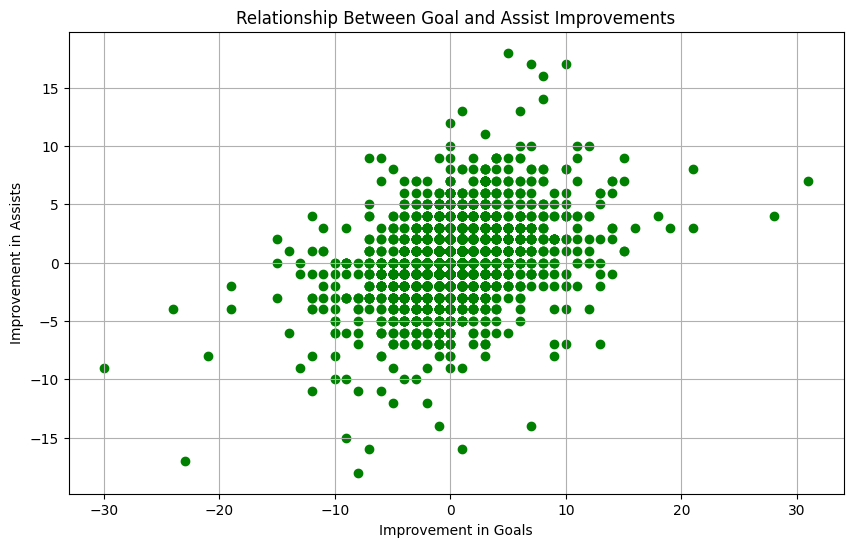

In [20]:
# Plotting the relationship between goal and assist improvements
plt.figure(figsize=(10, 6))
plt.scatter(top_improvers['goal_improvement'], top_improvers['assist_improvement'], color='green')
plt.xlabel('Improvement in Goals')
plt.ylabel('Improvement in Assists')
plt.title('Relationship Between Goal and Assist Improvements')
plt.grid(True)
plt.show()


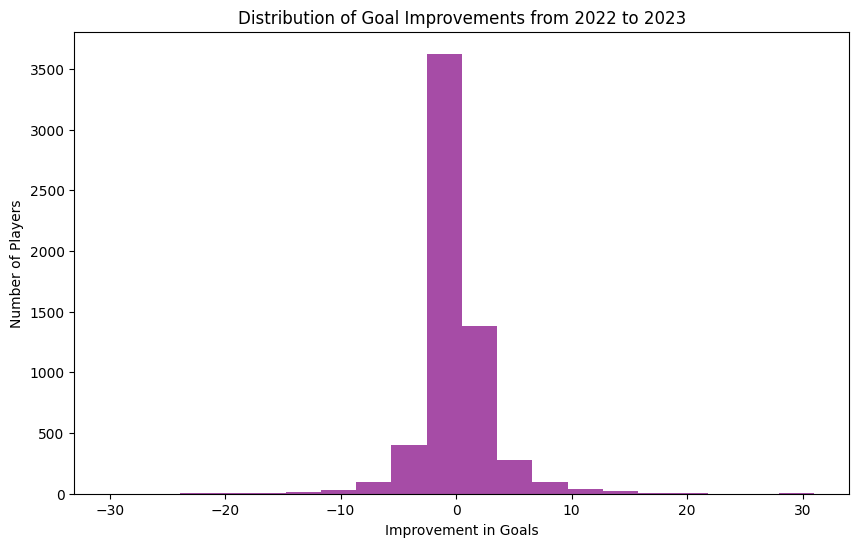

In [21]:
# Distribution of goal improvements
plt.figure(figsize=(10, 6))
plt.hist(top_improvers['goal_improvement'], bins=20, color='purple', alpha=0.7)
plt.xlabel('Improvement in Goals')
plt.ylabel('Number of Players')
plt.title('Distribution of Goal Improvements from 2022 to 2023')
plt.show()


<Figure size 1200x800 with 0 Axes>

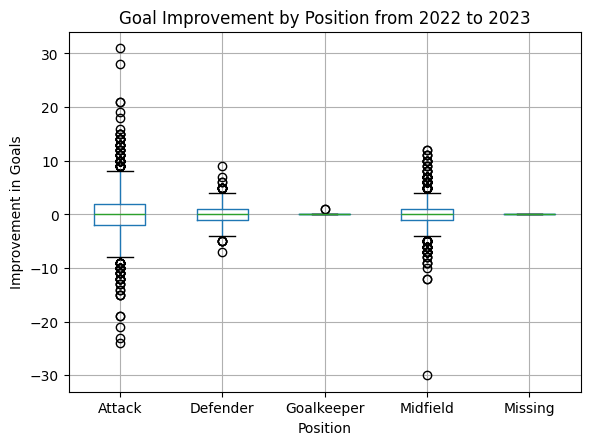

In [22]:
# Boxplot of goal improvement by position
plt.figure(figsize=(12, 8))
top_improvers.boxplot(column=['goal_improvement'], by='position')
plt.xlabel('Position')
plt.ylabel('Improvement in Goals')
plt.title('Goal Improvement by Position from 2022 to 2023')
plt.suptitle('')
plt.show()


In [23]:

# Load appearances data
appearances_df = pd.read_csv('./data/cleaned_appearances.csv')
appearances_df['date'] = pd.to_datetime(appearances_df['date'])
appearances_df['season'] = appearances_df['date'].dt.year

# Filter for the 2022 and 2023 seasons only
filtered_df = appearances_df[appearances_df['season'].isin([2022, 2023])]

# Aggregate performance metrics by player and season
performance_metrics = filtered_df.groupby(['player_id', 'season']).agg({
    'goals': 'sum',
    'assists': 'sum',
    'minutes_played': 'sum'
}).reset_index()

# Pivot the data to compare 2022 to 2023 directly
pivot_df = performance_metrics.pivot(index='player_id', columns='season', values=['goals', 'assists', 'minutes_played'])
pivot_df.columns = ['_'.join(map(str, col)).strip() for col in pivot_df.columns.values]

# Calculate improvement
pivot_df['goal_improvement'] = pivot_df['goals_2023'] - pivot_df['goals_2022']
pivot_df['assist_improvement'] = pivot_df['assists_2023'] - pivot_df['assists_2022']

# Load player valuations data
valuations_df = pd.read_csv('./data/player_valuations.csv')
valuations_df['date'] = pd.to_datetime(valuations_df['date'])
valuations_df['year'] = valuations_df['date'].dt.year

# Get the latest market value for each player for 2022 and 2023
latest_valuations = valuations_df.groupby(['player_id', 'year'])['market_value_in_eur'].last().unstack()

# Merge market values into the pivot_df
pivot_df = pivot_df.merge(latest_valuations, left_index=True, right_index=True, how='left')
pivot_df.rename(columns={2022: 'market_value_2022', 2023: 'market_value_2023'}, inplace=True)

# Load player details
players_df = pd.read_csv('./data/cleaned_players.csv')

# Merge improvements with player details
result_df = pivot_df.merge(players_df[['player_id', 'name', 'position', 'current_club_name', 'date_of_birth', 'foot']],
                           on='player_id', how='left')

# Calculate market value change
result_df['market_value_change'] = result_df['market_value_2023'] - result_df['market_value_2022']

# Sort by goal improvement to find top improvers
top_improvers = result_df.sort_values(by='goal_improvement', ascending=False)

# Print the top 10 improved players with market value changes
print(top_improvers[['name', 'position', 'current_club_name', 'goal_improvement', 'assist_improvement', 'market_value_2022', 'market_value_2023', 'market_value_change']].head(10))


                   name position  \
727        Mauro Icardi   Attack   
7098   Santiago Gimenez   Attack   
775        Luuk de Jong   Attack   
5786  Youssef En-Nesyri   Attack   
1465  Antoine Griezmann   Attack   
8869      Abdallah Sima   Attack   
8870    Nicolas Jackson   Attack   
5460   Lautaro Martínez   Attack   
7332     Julián Álvarez   Attack   
6945     Thijs Dallinga   Attack   

                                      current_club_name  goal_improvement  \
727                             Galatasaray Spor Kulübü              31.0   
7098                                Feyenoord Rotterdam              28.0   
775   Eindhovense Voetbalvereniging Philips Sport Ve...              21.0   
5786                         Sevilla Fútbol Club S.A.D.              21.0   
1465                     Club Atlético de Madrid S.A.D.              19.0   
8869             Brighton and Hove Albion Football Club              18.0   
8870                              Chelsea Football Club         

C:\Users\Rony\AppData\Local\Temp\ipykernel_28564\438381126.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_improvers['name'], rotation=45, ha='right')


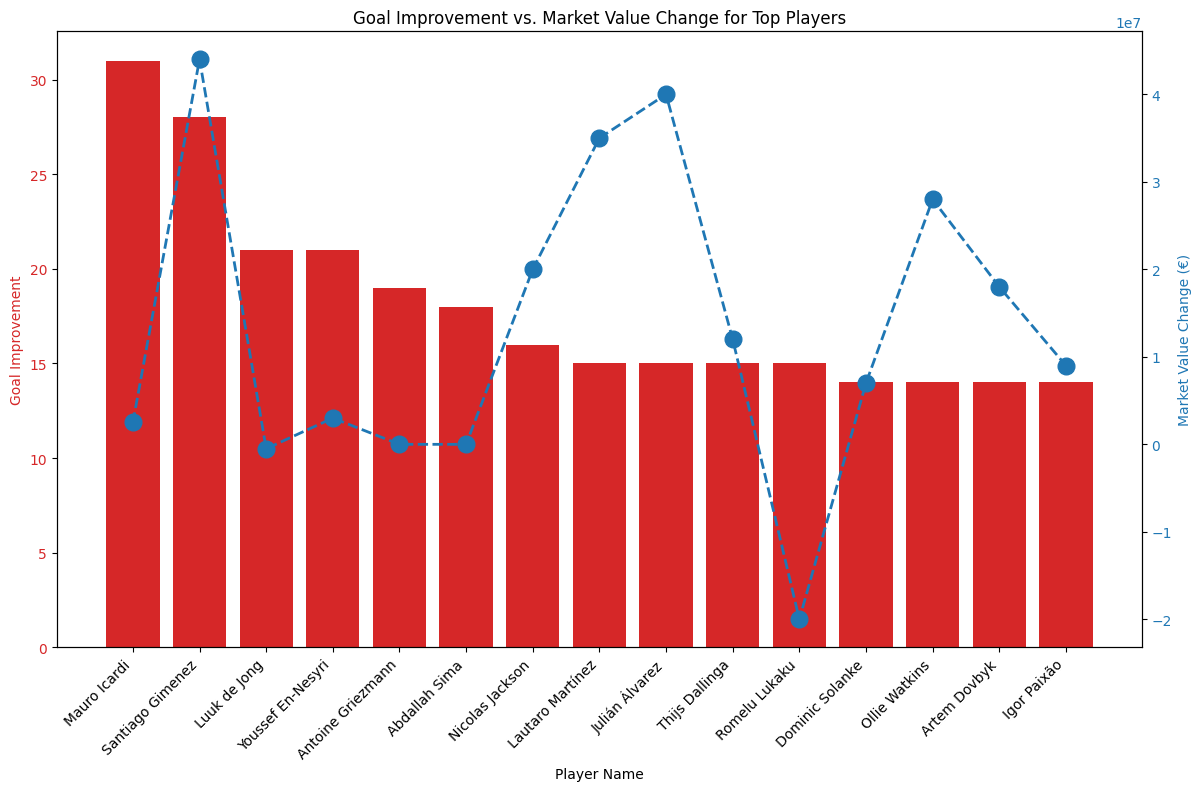

In [24]:
# Select the top 15 players with the highest goal improvement
top_improvers = top_improvers.head(15)

# Create a bar plot for goal improvement
fig, ax1 = plt.subplots(figsize=(14, 8))

# Create a bar plot for goal improvement
color = 'tab:red'
ax1.set_xlabel('Player Name')
ax1.set_ylabel('Goal Improvement', color=color)
ax1.bar(top_improvers['name'], top_improvers['goal_improvement'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(top_improvers['name'], rotation=45, ha='right')

# Create a second y-axis for market value change
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Market Value Change (€)', color=color)
ax2.plot(top_improvers['name'], top_improvers['market_value_change'], color=color, marker='o', linestyle='dashed', linewidth=2, markersize=12)
ax2.tick_params(axis='y', labelcolor=color)

# Title and labels
plt.title('Goal Improvement vs. Market Value Change for Top Players')
plt.show()

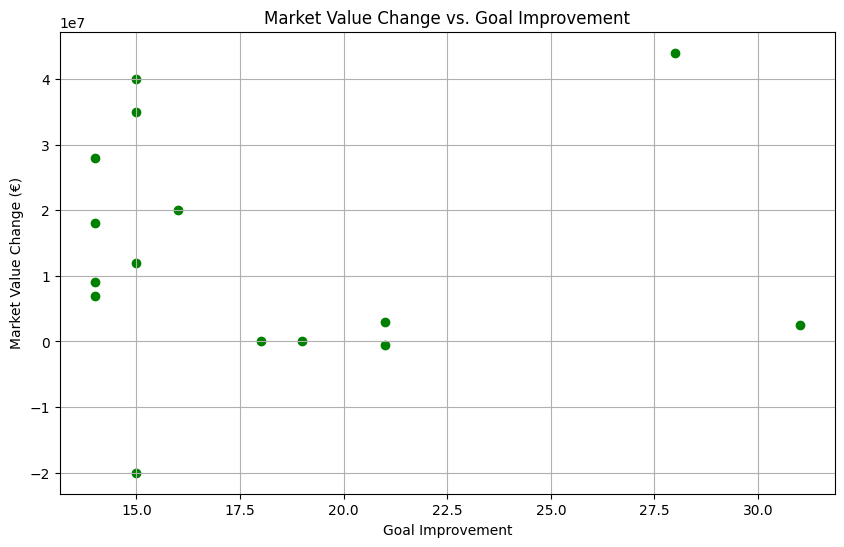

In [25]:
# Scatter plot of market value change vs. goal improvement
plt.figure(figsize=(10, 6))
plt.scatter(top_improvers['goal_improvement'], top_improvers['market_value_change'], color='green')
plt.title('Market Value Change vs. Goal Improvement')
plt.xlabel('Goal Improvement')
plt.ylabel('Market Value Change (€)')
plt.grid(True)
plt.show()


C:\Users\Rony\AppData\Local\Temp\ipykernel_28564\1631750151.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_improvers['name'], rotation=45, ha='right')


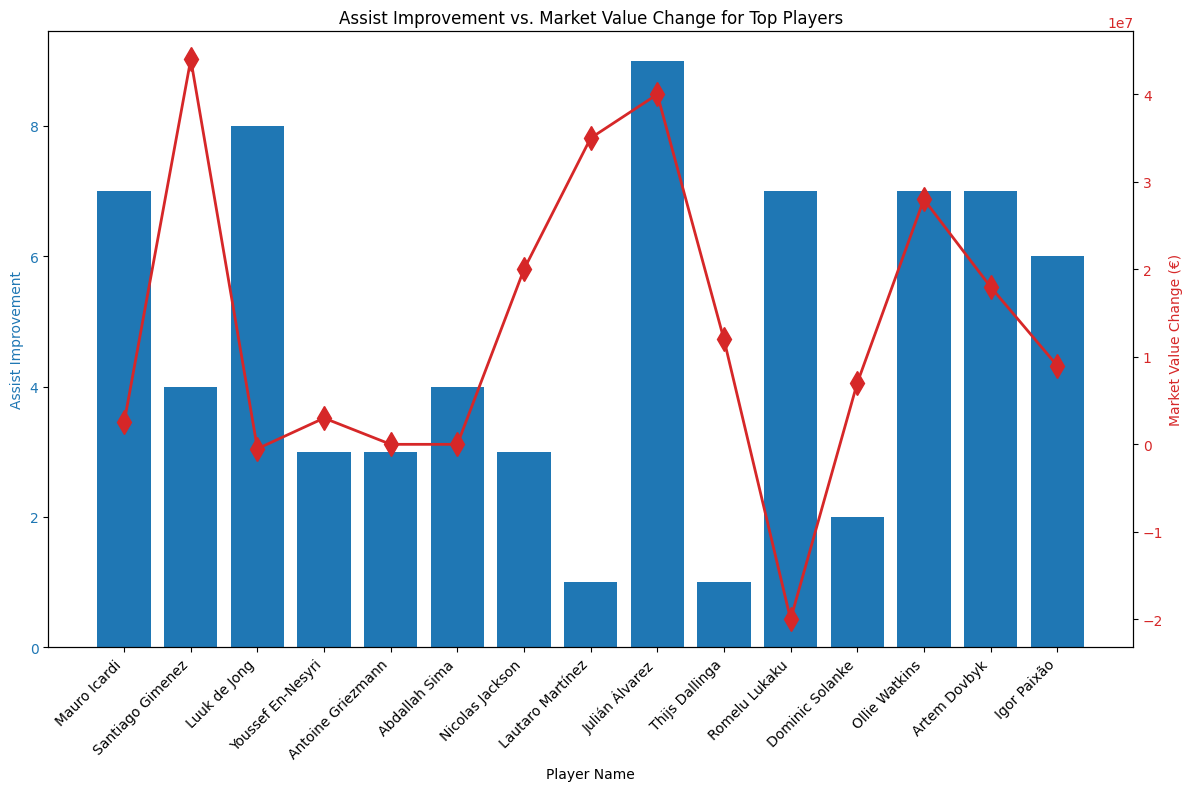

In [26]:
# Load the top improvers data
fig, ax1 = plt.subplots(figsize=(14, 8))

# Create a bar plot for assist improvement
color = 'tab:blue'
ax1.set_xlabel('Player Name')
ax1.set_ylabel('Assist Improvement', color=color)
ax1.bar(top_improvers['name'], top_improvers['assist_improvement'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(top_improvers['name'], rotation=45, ha='right')

# Create a second y-axis to show market value change
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Market Value Change (€)', color=color)
ax2.plot(top_improvers['name'], top_improvers['market_value_change'], color=color, marker='d', linestyle='-', linewidth=2, markersize=12)
ax2.tick_params(axis='y', labelcolor=color)

# Add a title and show the plot
plt.title('Assist Improvement vs. Market Value Change for Top Players')
plt.show()


     position  goal_improvement  assist_improvement
0      Attack          0.252832            0.081097
3    Midfield          0.116041            0.179181
1    Defender          0.041547            0.080229
2  Goalkeeper          0.004301           -0.004301


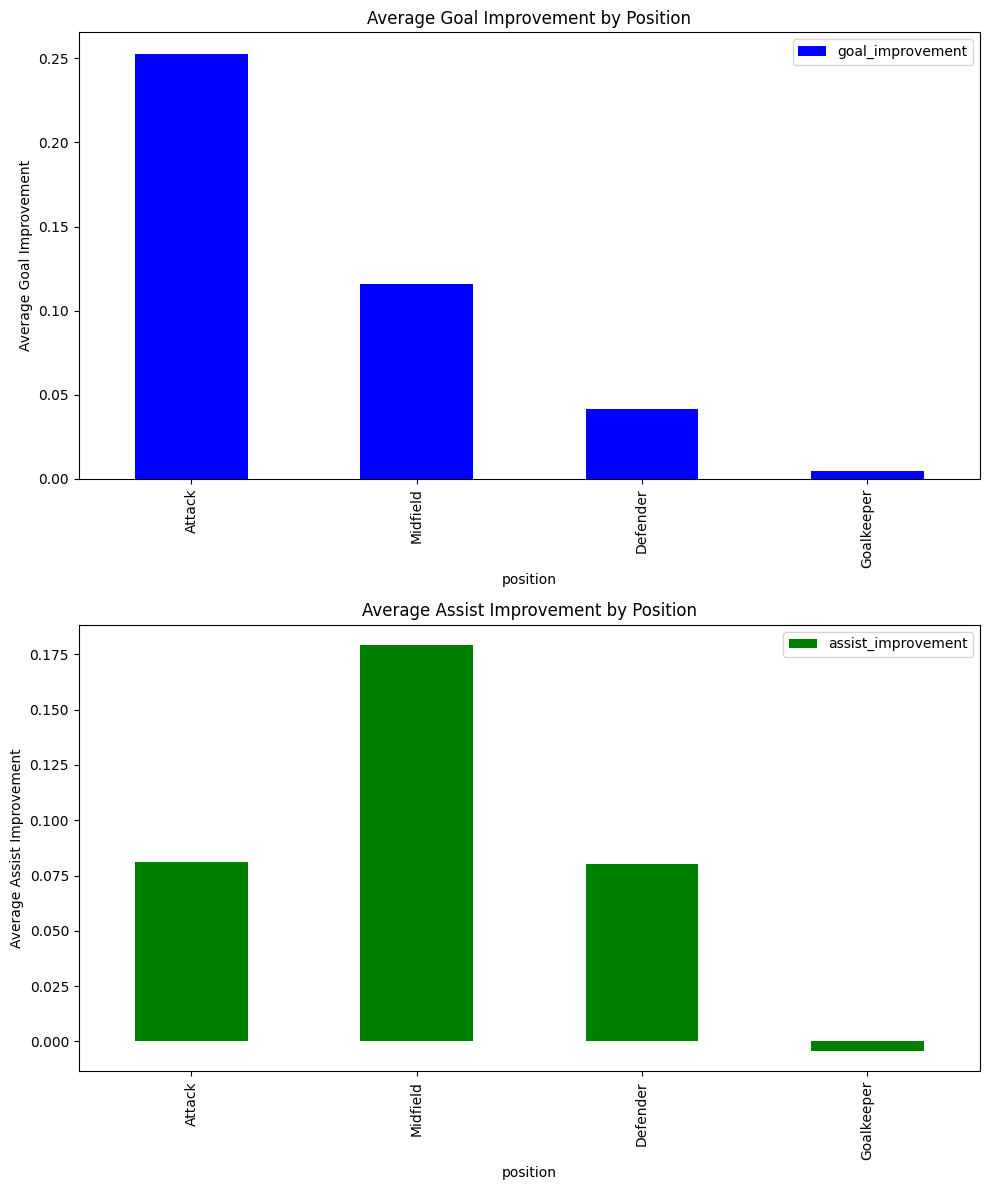

In [27]:
# Drop rows where 'position' is 'Missing' or any key columns are missing
cleaned_result_df = result_df[result_df['position'] != 'Missing'].dropna(subset=['position', 'goal_improvement', 'assist_improvement'])

# Group the result by position and calculate average improvements in goals and assists
position_improvements = cleaned_result_df.groupby('position').agg({
    'goal_improvement': 'mean',
    'assist_improvement': 'mean'
}).reset_index()

# Sort results to find positions with the highest average improvements
position_improvements = position_improvements.sort_values(by=['goal_improvement', 'assist_improvement'], ascending=False)

# Print the results
print(position_improvements)

# Optionally, visualize the results
fig, ax = plt.subplots(2, 1, figsize=(10, 12))
position_improvements.plot(x='position', y='goal_improvement', kind='bar', ax=ax[0], color='blue')
ax[0].set_title('Average Goal Improvement by Position')
ax[0].set_ylabel('Average Goal Improvement')
 # Plot the average assist improvement by position
position_improvements.plot(x='position', y='assist_improvement', kind='bar', ax=ax[1], color='green')
ax[1].set_title('Average Assist Improvement by Position')
ax[1].set_ylabel('Average Assist Improvement')

plt.tight_layout()
plt.show()

Correlation Matrix:
                      goal_improvement  assist_improvement  market_value_change
goal_improvement             1.000000            0.357752             0.321029
assist_improvement           0.357752            1.000000             0.277316
market_value_change          0.321029            0.277316             1.000000


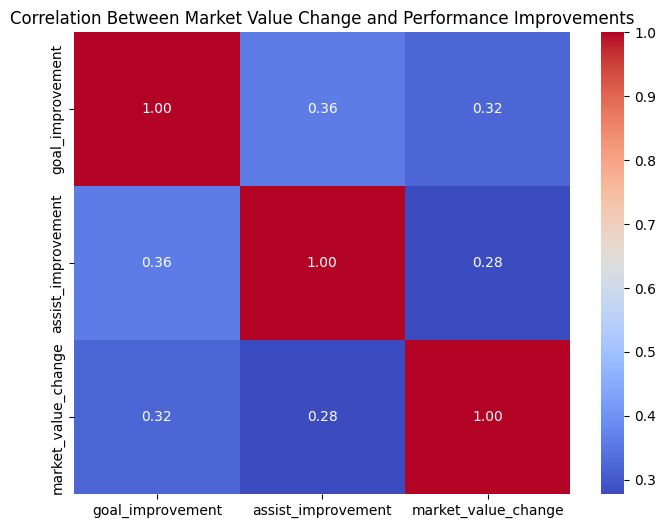

In [28]:
# Calculate the correlation between market value change and performance improvements
correlation_data = result_df[['goal_improvement', 'assist_improvement', 'market_value_change']].corr()

# Print the correlation matrix
print("Correlation Matrix:\n", correlation_data)

# Visualize the correlations using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Market Value Change and Performance Improvements')
plt.show()
